<a href="https://colab.research.google.com/github/karamfarwan/Jop-Zone/blob/master/data%20analysis%20on%20the%20'120%20Years%20of%20Olympic%20History'%20dataset%20from%20Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

**About the dataset :**
The dataset was sourced from https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/home.

**The athletes_events file**

In [ ]:
athletes = pd.read_csv('/content/athlete_events.csv',error_bad_lines=False, engine="python")

<ipython-input-46-62ddf760f3cc>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  athletes = pd.read_csv('/content/athlete_events.csv',error_bad_lines=False, engine="python")


In [ ]:
athletes.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN


**Regions data:**

In [ ]:
regions = pd.read_csv('/content/noc_regions.csv')


In [ ]:
regions

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


How many years does this cover?

In [ ]:
print("Min year: ", athletes.Year.min(), ". Max year: ", athletes.Year.max())


Min year:  1896.0 . Max year:  2016.0


How does participation look like?

<Axes: >

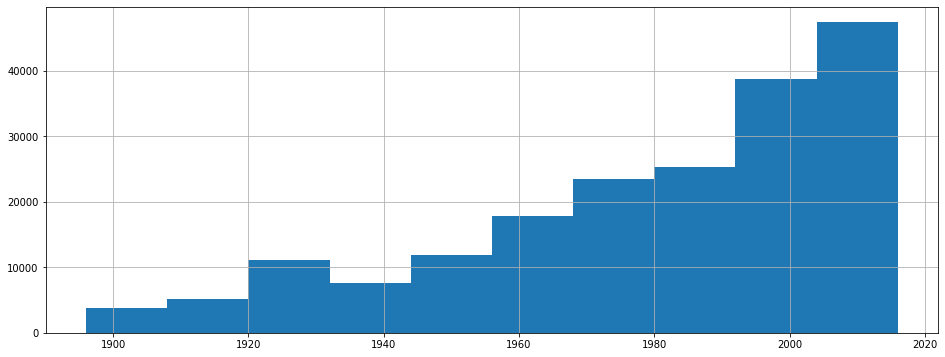

In [ ]:
athletes.Year.hist(figsize=[16,6])

The above must be participation per athlete per discipline. How about the participation by athlete only?

In [ ]:
year_groups = athletes.groupby('Year')
year_counts = year_groups['ID'].nunique().sort_index()

<Axes: title={'center': 'Unique athlete counts'}, xlabel='Year'>

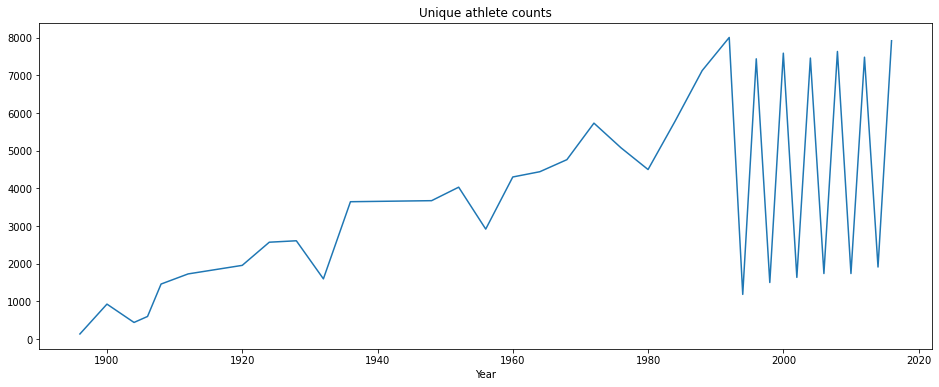

In [ ]:
year_counts.plot(figsize=[16,6], title='Unique athlete counts')


What's the weird pattern towards the end?

<Axes: title={'center': 'Summer and Winder Olympics athlete counts'}, xlabel='Year'>

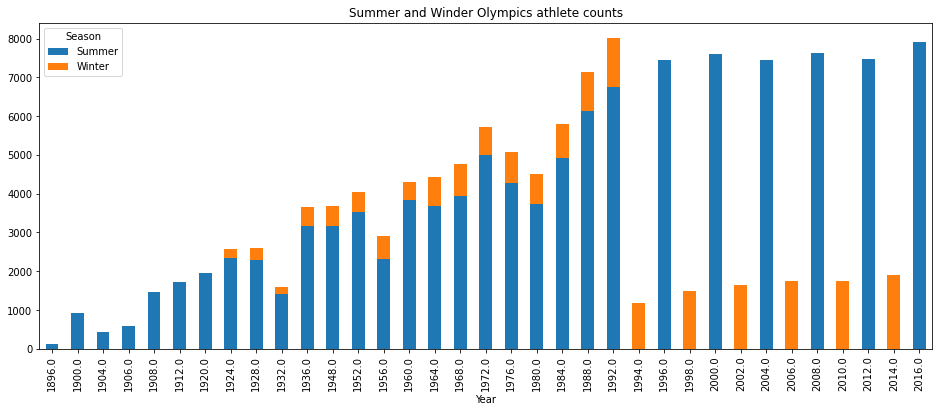

In [ ]:
year_season_groups = athletes.groupby(['Year', 'Season'])['ID'].nunique().sort_index()

year_season_groups.unstack().plot(figsize=[16,6], stacked=True, kind='bar', title='Summer and Winder Olympics athlete counts')


So it seems the reason for the weird pattern at the end is that Summer Olympics take place 2 in separate years.



How many distinct athletes do we have in total?

In [ ]:
len(athletes.ID.value_counts())


96559

**Athletes' gender:**
How do genders of athletes look like over the competitions?

<Axes: title={'center': 'Athletes gender over competitions'}, xlabel='Year'>

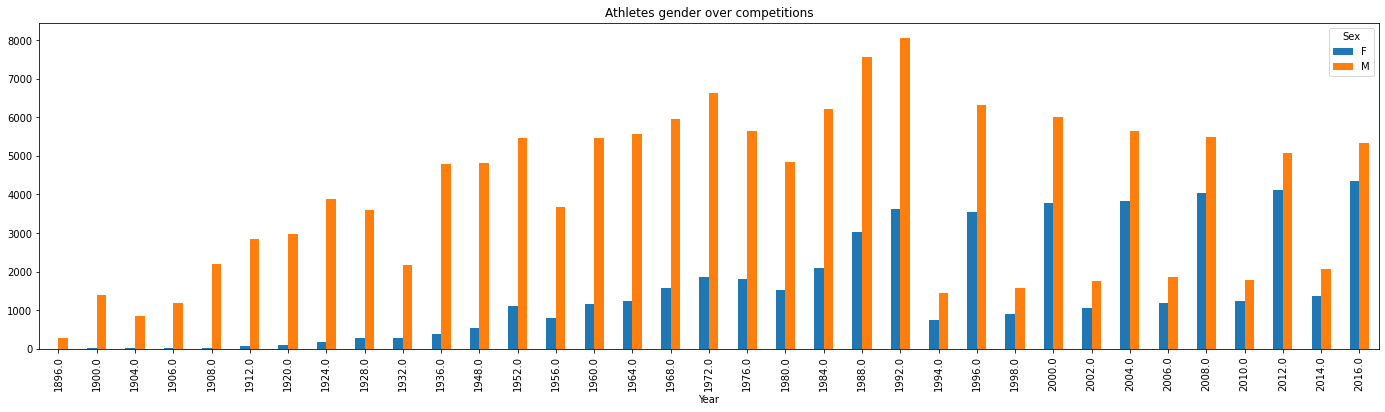

In [ ]:
year_gender_groups = athletes.groupby(['Year', 'Sex'])

year_gender_groups['ID'].count().unstack().plot(kind='bar', title='Athletes gender over competitions', figsize=[24, 6])

It seems that the M/F ratio has been decreasing over the years. The percentage of female participation is growing and is getting closer and closer to a 50/50 case.

In [ ]:
genders = athletes.groupby(['Year', 'Sex'])['Sex'].count().unstack().fillna(0).apply(lambda l: l/l.sum(), axis=1) * 100
genders['Delta'] = genders['M'] - genders['F']

<ipython-input-58-c4431e53a553>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl.set_yticklabels(['{tick}%'.format(tick=t) for t in pl.get_yticks()])


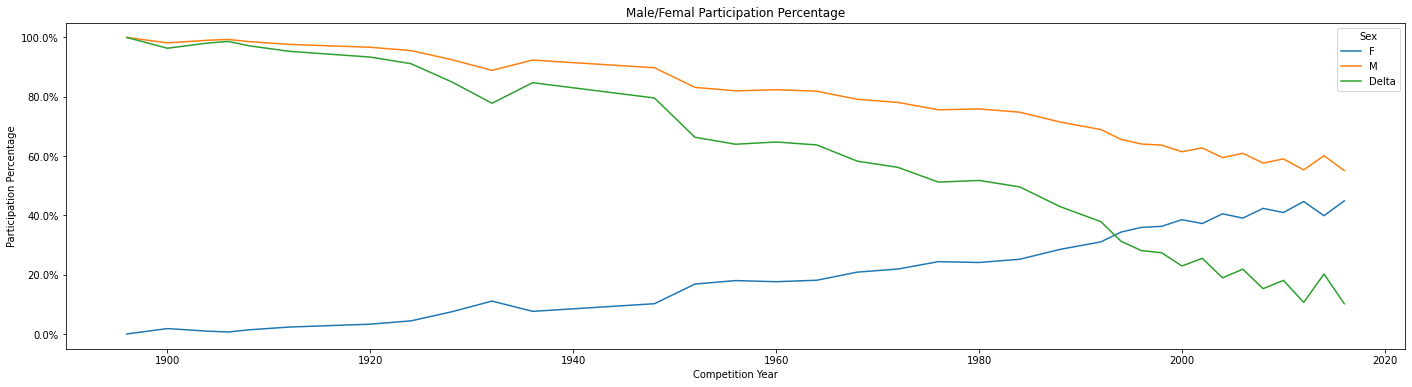

In [ ]:
pl = genders.plot(figsize=[24, 6])
pl.set_yticklabels(['{tick}%'.format(tick=t) for t in pl.get_yticks()])
pl.set_ylabel('Participation Percentage')
pl.set_xlabel('Competition Year')
pl.set_title('Male/Femal Participation Percentage')
print('')

**Athletes' Age**

Let's see the overall age distribution



<Axes: >

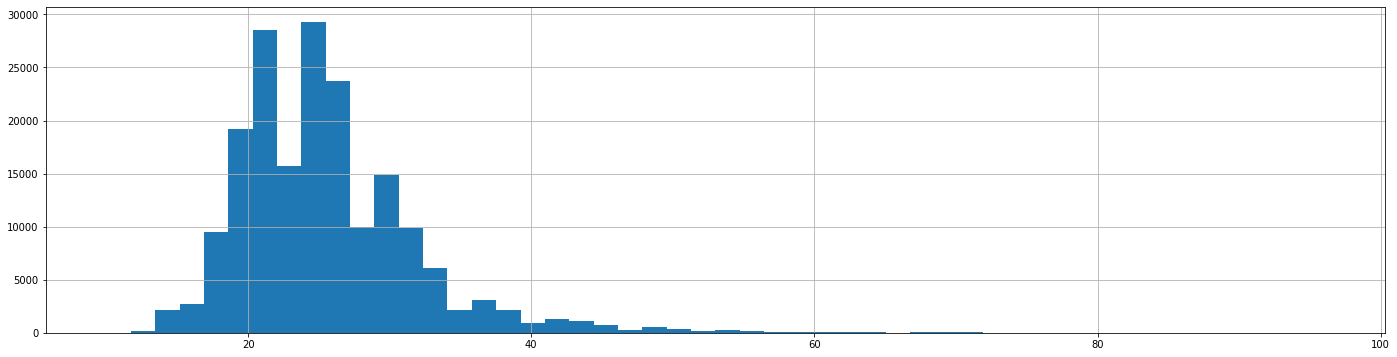

In [ ]:
athletes.Age.hist(figsize=[24, 6], bins=50)


How about age groups? Let's say:



Under 20

20 -25

25 - 30

30 - 40

Over 40

In [ ]:
age_bins = pd.cut(athletes.Age, bins=[0, 20, 25, 30, 40, 100], labels=['Under 20', '20-25', '25-30', '30-40', 'Uver 40'])


In [ ]:
age_group_counts = athletes.Age.groupby(age_bins).count()


**Athlete Age group distribution**



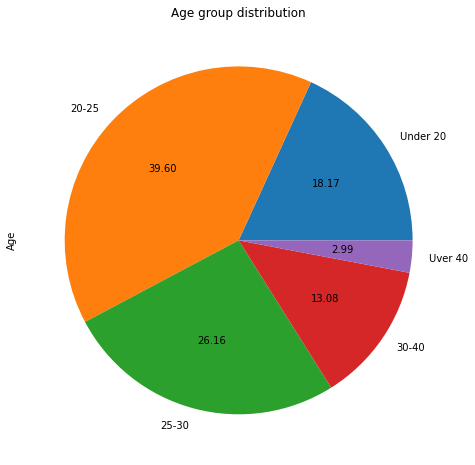

In [ ]:
age_pie = age_group_counts.plot(kind='pie', figsize=[8, 8], autopct="%.2f")
age_pie.set_title('Age group distribution')
age_pie.set_yticklabels(['{tick}%'.format(tick=t) for t in age_pie.get_yticks()])

print()

**Countries/Teams: **

countries have participated in Olympic games
overall

In [ ]:
athletes['NOC'].nunique()


230

teams have participated in Olympic games overall

In [ ]:
athletes['Team'].nunique()


1116

Participation by region:

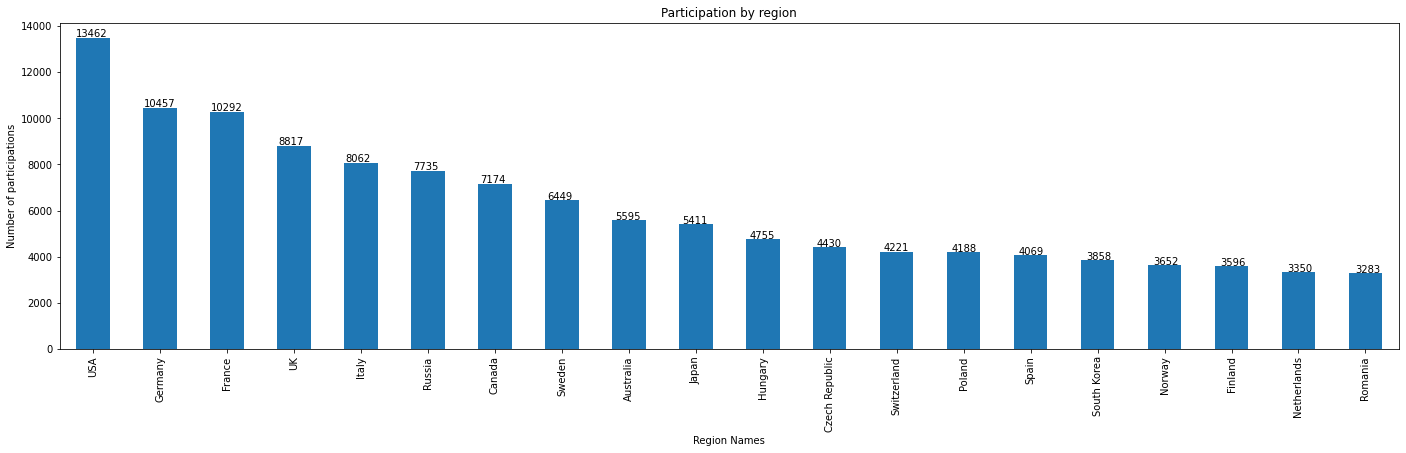

In [ ]:
athletes_with_names = pd.merge(athletes, regions, left_on='NOC', right_on='NOC', how='left').drop('notes', axis=1)
athletes = athletes_with_names


country_counts = athletes.groupby('region')['region'].count()
country_counts_plt = country_counts.nlargest(20).plot(kind='bar', figsize=(24, 6))

country_counts_plt.set_title('Participation by region')
country_counts_plt.set_ylabel('Number of participations')
country_counts_plt.set_xlabel('Region Names')

for p in country_counts_plt.patches:
    country_counts_plt.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
print()

Participation by Host city:

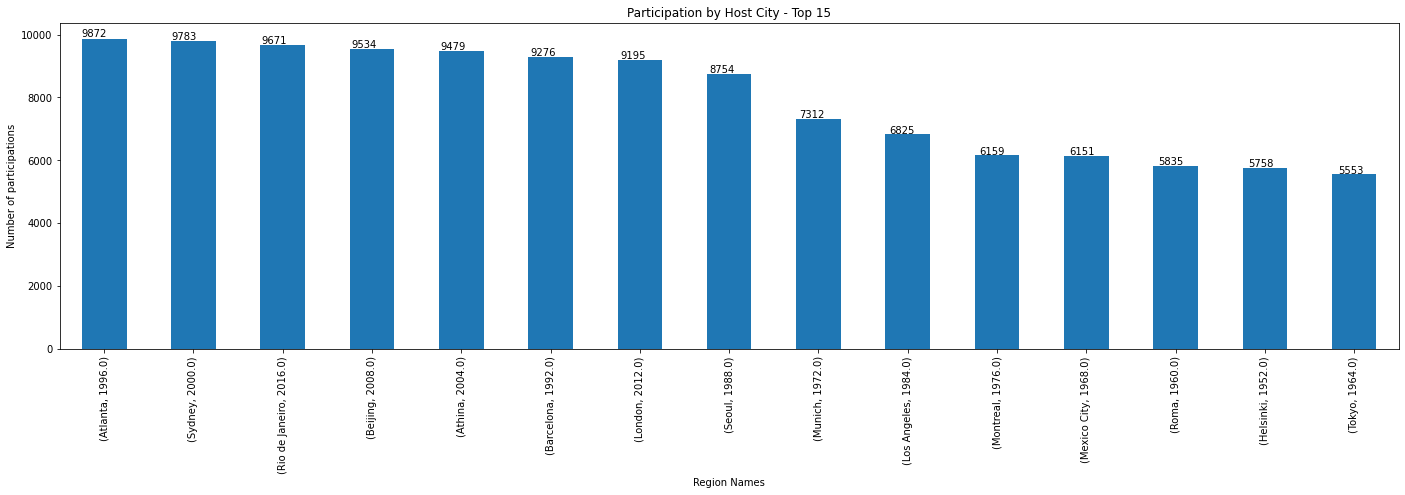

In [ ]:
country_counts = athletes.groupby(['City', 'Year'])['City'].count()
country_counts_plt = country_counts.nlargest(15).plot(kind='bar', figsize=(24, 6))

country_counts_plt.set_title('Participation by Host City - Top 15')
country_counts_plt.set_ylabel('Number of participations')
country_counts_plt.set_xlabel('Region Names')

for p in country_counts_plt.patches:
    country_counts_plt.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
print()

**Sports**

In [ ]:
athletes.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China


 unique sports does this dataset account :

In [ ]:
athletes.Sport.nunique()


65

see how many sports featured in each competition over the years

In [ ]:
year_sports_groups = athletes.groupby('Year', as_index=True)['Sport']


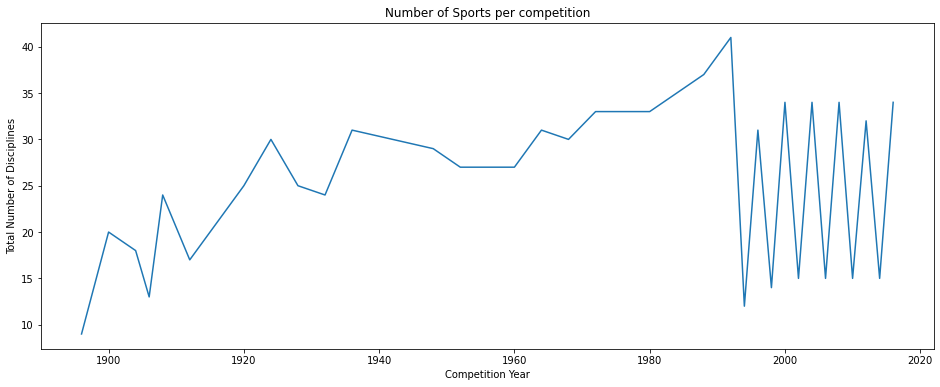

In [ ]:
ysgpl = year_sports_groups.agg(lambda l: l.nunique()).plot(figsize=(16, 6))
ysgpl.set_title('Number of Sports per competition')
ysgpl.set_xlabel('Competition Year')
ysgpl.set_ylabel('Total Number of Disciplines')
print()

the most popular sports:

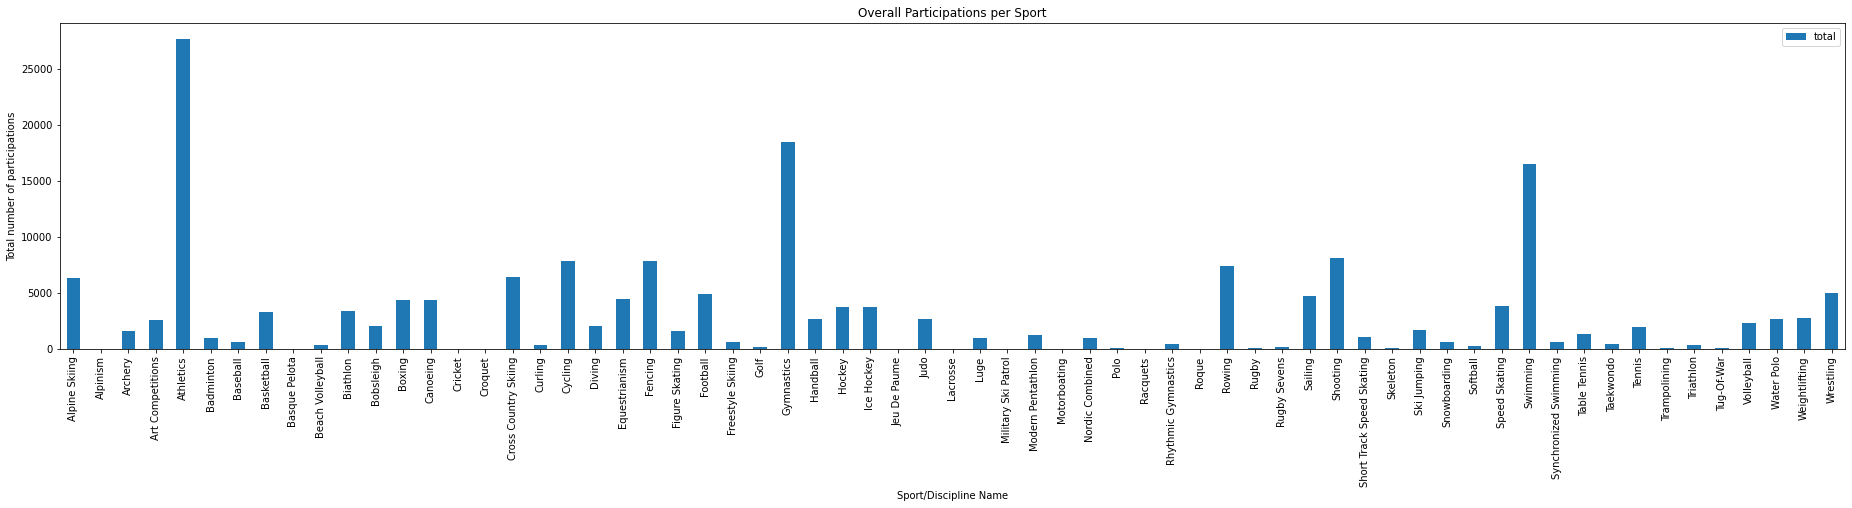

In [ ]:
sportplt = athletes.groupby('Sport', as_index=True).count()['ID'].reset_index().assign(total=lambda l: l.ID).plot(kind='bar', figsize=(32, 6), x='Sport', y='total')
sportplt.set_xlabel('Sport/Discipline Name')
sportplt.set_ylabel('Total number of participations')
sportplt.set_title('Overall Participations per Sport')
print()

**Medals**

medals have been awarded by type overall

In [ ]:
medalsgp = athletes['Medal'].reset_index().groupby('Medal')
medalsgp.count().reset_index()

,Medal,index
0,Bronze,9303
1,Gold,9337
2,Silver,9199


medals have been awarded by sport

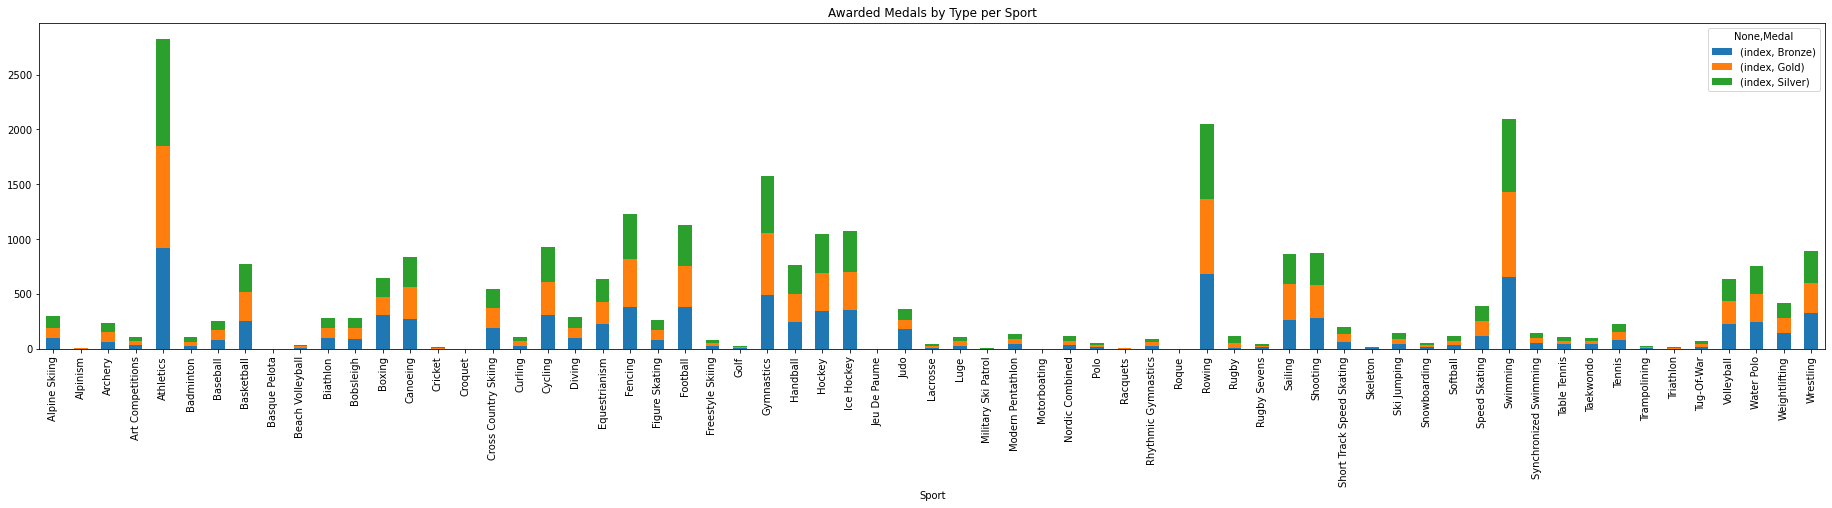

In [ ]:
athletes[['Sport', 'Medal']].reset_index().groupby(['Sport', 'Medal']).count().unstack().fillna(0).plot(kind='bar', stacked=True, figsize=(32, 6), title='Awarded Medals by Type per Sport')
print()

Awarded Medals by Type per Year

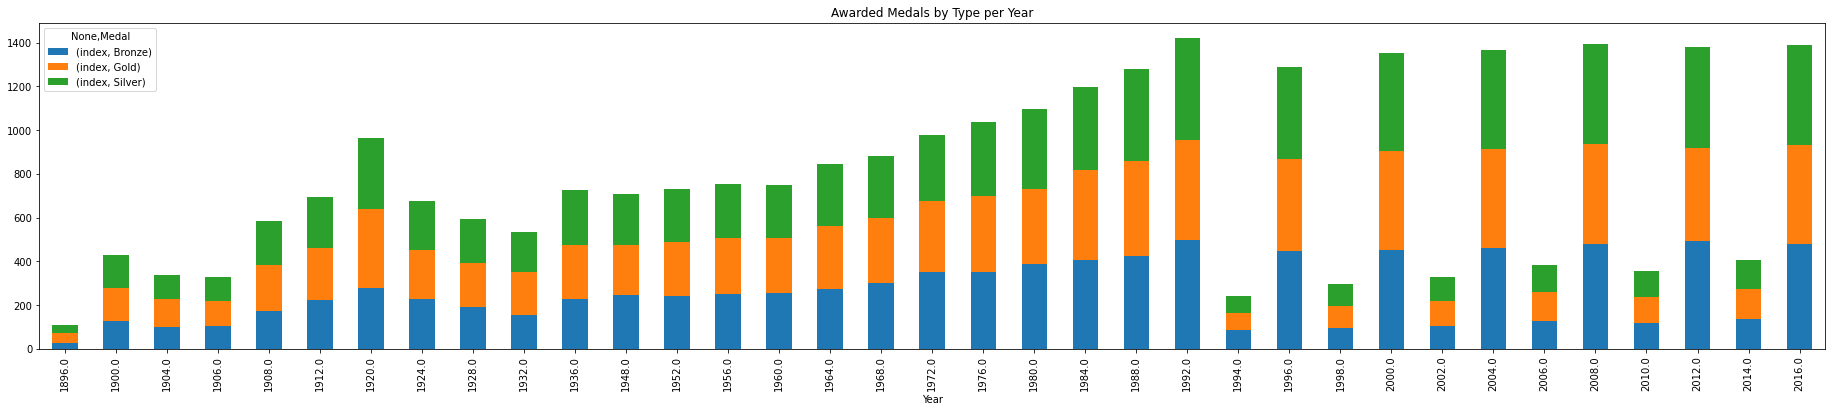

In [ ]:
athletes[['Year', 'Medal']].reset_index().groupby(['Year', 'Medal']).count().unstack().fillna(0).plot(kind='bar', stacked=True, figsize=(32, 6), title='Awarded Medals by Type per Year')
print()

In [ ]:
athletes[['Year', 'Medal']].reset_index().groupby(['Year', 'Medal']).count()


index
Year   Medal        
1896.0 Bronze     27
       Gold       47
       Silver     34
1900.0 Bronze    127
       Gold      150
...              ...
2014.0 Gold      135
       Silver    134
2016.0 Bronze    481
       Gold      449
       Silver    460

[105 rows x 1 columns]

Awarded Medals by Type per Country

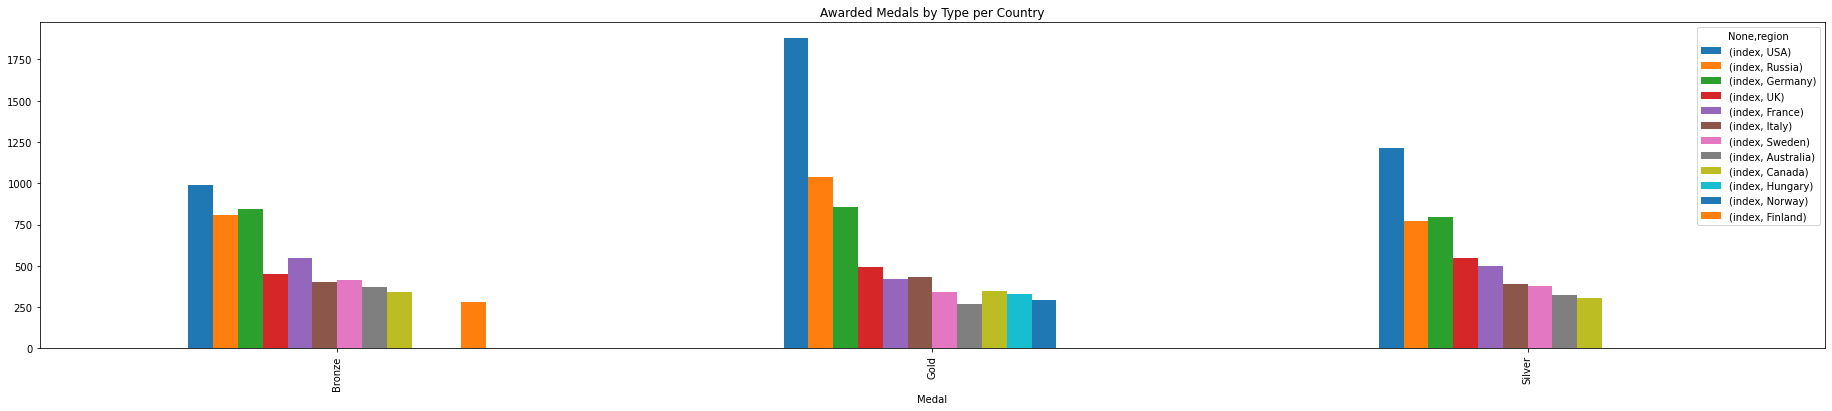

In [ ]:
athletes[['Medal', 'region']].reset_index().groupby(['Medal', 'region']).count().sort_values(by='index', ascending=False).head(30).unstack().fillna(0).plot(kind='bar', stacked=False, figsize=(32, 6), title='Awarded Medals by Type per Country')
print()

Awarded Medals by Type per Athletes

In [ ]:
athletes[['Medal', 'ID', 'Name']].reset_index().groupby(['Medal', 'ID', 'Name']).count().sort_values(by='index', ascending=False).reset_index()


,Medal,ID,Name,index
0,Gold,94406,"Michael Fred Phelps, II",23
1,Gold,33557,"Raymond Clarence ""Ray"" Ewry",10
2,Gold,69210,"Frederick Carlton ""Carl"" Lewis",9
3,Gold,67046,Larysa Semenivna Latynina (Diriy-),9
4,Gold,87390,Paavo Johannes Nurmi,9
...,...,...,...,...
23653,Gold,4928,Katie Louise Archibald,1
23654,Gold,4926,"Jeffrey Victor ""Jeff"" Archibald",1
23655,Gold,4920,"Alexander ""Sandy"" Archer",1
23656,Gold,4860,Alexandra Araujo,1
